<a href="https://colab.research.google.com/github/PPythnoni/sound/blob/main/language_classifier_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from IPython.display import Audio
import librosa, librosa.display

#dataset of 5400 10 sec flac samples of Spanish, German and English speakers
DATA_PATH = "/content/drive/MyDrive/Python/mini_train.json"

In [15]:
sample_esp = "/content/es_f_50298ab71aaba8508ebeef49d853df11.fragment1.flac"
sample_en = "/content/en_f_67a0cba10d171b24039a79faa1d4d603.fragment1.flac"
sample_de = "/content/de_f_63f5b79c76cf5a1a4bbd1c40f54b166e.fragment1.flac"

In [16]:
def sound_wave_plot(sample):
  signal, sr = librosa.load(sample,sr=22050)
  librosa.display.waveplot(signal, sr=sr)
  plt.xlabel("Time")
  plt.ylabel("Amplitude")
  plt.show()


In [17]:
Audio(sample_esp)

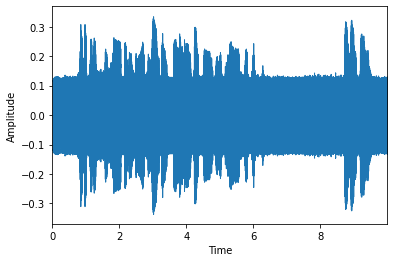

In [18]:
sound_wave_plot(sample_esp)

In [19]:
Audio(sample_en)

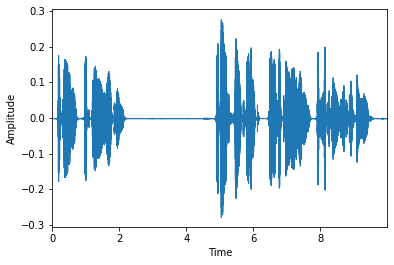

In [20]:
sound_wave_plot(sample_en)

In [21]:
Audio(sample_de)

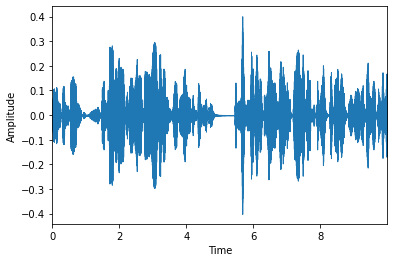

In [22]:
sound_wave_plot(sample_de)

In [23]:
def load_data(data_path):

    with open(data_path, "r") as fp:
        data = json.load(fp)

    # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    
    return  X, y

In [24]:
def plot_history(history):
  
    fig, axs = plt.subplots(2)

    # accuracy plot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # error plot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

In [25]:
# load data
X, y = load_data(DATA_PATH)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = keras.Sequential([
  keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),
  keras.layers.Dense(512, activation='relu'),
  keras.layers.Dense(256, activation='relu'),
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dense(3, activation='softmax')
])

    # compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1131)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               579584    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 195       
Total params: 727,555
Trainable params: 727,555
Non-trainable params: 0
_________________________________________________________________


In [26]:
# train
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=40)

Epoch 1/40
591/591 [==============================] - 4s 6ms/step - loss: 3.7589 - accuracy: 0.6778 - val_loss: 1.5794 - val_accuracy: 0.7478
Epoch 2/40
591/591 [==============================] - 4s 6ms/step - loss: 1.0890 - accuracy: 0.7981 - val_loss: 0.9214 - val_accuracy: 0.8200
Epoch 3/40
591/591 [==============================] - 5s 8ms/step - loss: 0.7228 - accuracy: 0.8472 - val_loss: 0.7449 - val_accuracy: 0.8501
Epoch 4/40
591/591 [==============================] - 8s 14ms/step - loss: 0.4825 - accuracy: 0.8855 - val_loss: 0.6772 - val_accuracy: 0.8709
Epoch 5/40
591/591 [==============================] - 12s 21ms/step - loss: 0.3987 - accuracy: 0.9004 - val_loss: 0.4726 - val_accuracy: 0.8967
Epoch 6/40
591/591 [==============================] - 20s 34ms/step - loss: 0.3544 - accuracy: 0.9083 - val_loss: 0.4424 - val_accuracy: 0.9005
Epoch 7/40
591/591 [==============================] - 16s 26ms/step - loss: 0.2950 - accuracy: 0.9233 - val_loss: 0.6670 - val_accuracy: 0.8757

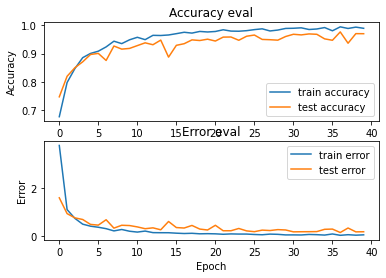

254/254 - 2s - loss: 0.1672 - accuracy: 0.9698

Test accuracy: 0.969753086566925


In [27]:
plot_history(history)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)